In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(136, 200, 3)

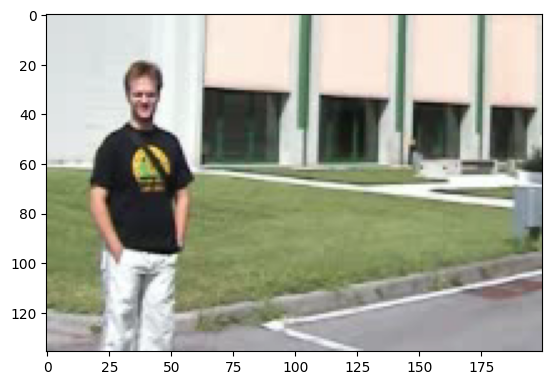

In [3]:
# 画像ファイルの読み込み
image = cv2.imread("sbi/sbi001.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
image_rgb.shape

(25, 25, 3)

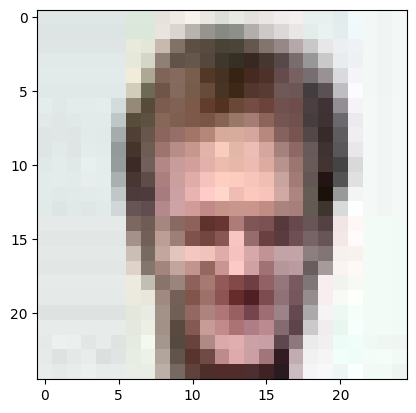

In [6]:
# 画像ファイルの読み込み
template = cv2.imread("template.png")

# BGRからRGBに変換
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

plt.imshow(template_rgb)
template_rgb.shape

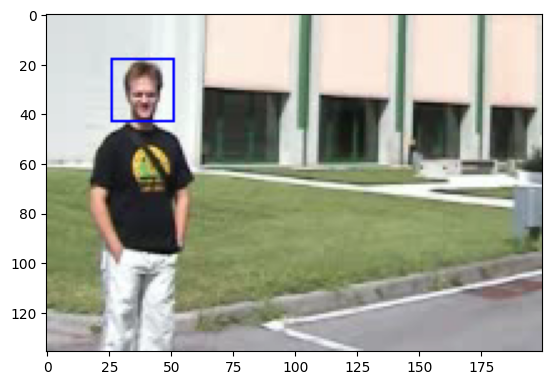

In [7]:
# 画像とテンプレートのサイズを取得
image_height, image_width, _ = image_rgb.shape
template_height, template_width, _ = template_rgb.shape

# 最も一致する位置とスコアを格納する変数を初期化
min_se = float("inf")
best_x = 0
best_y = 0

# テンプレートマッチングの繰り返し計算
for y in range(image_height - template_height + 1):
    for x in range(image_width - template_width + 1):
        
        # 部分領域の切り取り
        region = image_rgb[y:y + template_height, x:x + template_width]

        # 各チャネルで平方和を算出
        se_r = np.sum((region[:, :, 0] - template_rgb[:, :, 0]) ** 2)  # Rチャンネル
        se_g = np.sum((region[:, :, 1] - template_rgb[:, :, 1]) ** 2)  # Gチャンネル
        se_b = np.sum((region[:, :, 2] - template_rgb[:, :, 2]) ** 2)  # Bチャンネル

        # 全チャンネルの平方和を合算
        se = (se_r + se_g + se_b)
        
        # 最大スコアとその位置を更新
        if se < min_se:
            min_se = se
            best_x, best_y = x, y

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)

(136, 200, 3)

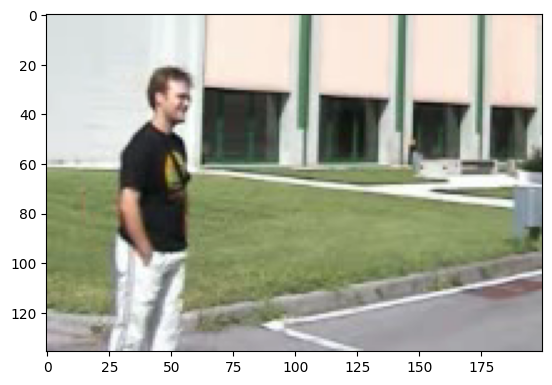

In [8]:
# 画像ファイルの読み込み
image = cv2.imread("sbi/sbi160.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
image_rgb.shape

0.9591857194900513


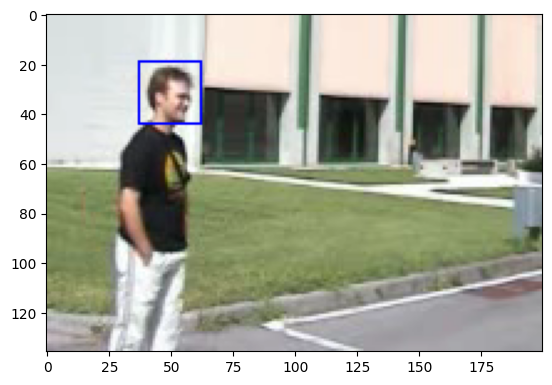

In [17]:
# テンプレートマッチングを実行（平方差）
result = cv2.matchTemplate(image_rgb, template_rgb, cv2.TM_CCORR_NORMED)

# 最小のスコアとその位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print(max_val)

# 最も一致する位置（最小のMSEスコアの位置）
best_x, best_y = max_loc

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)

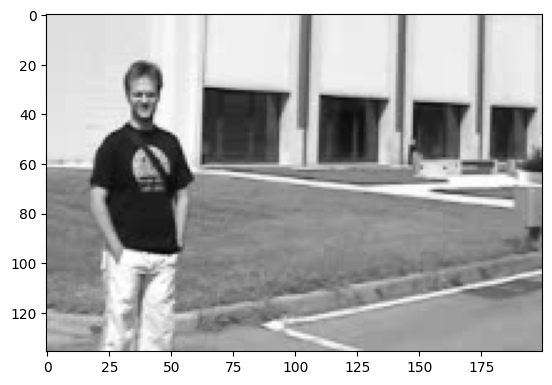

In [18]:
# 画像を読み込み
image = cv2.imread("sbi/sbi001.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

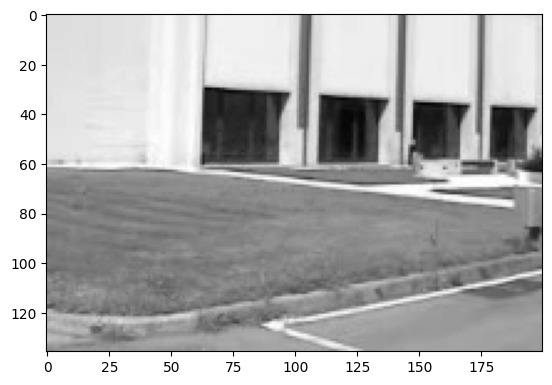

In [19]:
# 背景画像を読み込み
background = cv2.imread("sbi/background.png")
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
plt.imshow(background_gray, cmap="gray")

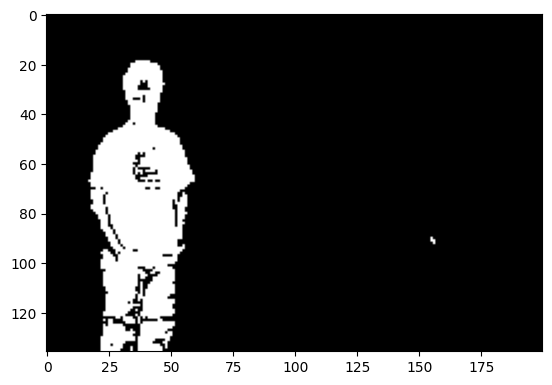

In [28]:
# 画像のサイズを取得
height, width = image_gray.shape

# 背景差分の結果を保存する空の配列を作成
foreground_mask = np.zeros_like(image_gray)

# 各ピクセルごとに背景差分を計算
threshold = 30  # 適切な閾値を設定
for y in range(height):
    for x in range(width):
        # ピクセルの値の差を計算
        diff = abs(int(image_gray[y, x]) - int(background_gray[y, x]))
        
        # 差分が閾値を超える場合は動いているとみなす
        if diff > threshold:
            foreground_mask[y, x] = 255  # 動いている部分は白にする
        else:
            foreground_mask[y, x] = 0    # 背景部分は黒にする

# 結果を表示
plt.imshow(foreground_mask, cmap="gray")

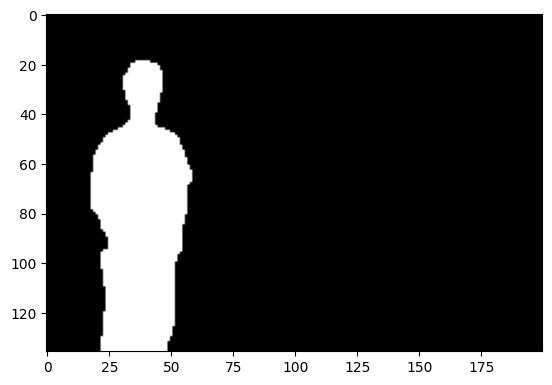

In [29]:
# カーネルの作成
kernel = np.ones((3, 3), np.uint8)  

# クロージング（エロージョン + ダイレーション）
foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# オープニング（ダイレーション + エロージョン）
foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel, iterations=2)

# 結果を表示
plt.imshow(foreground_mask, cmap="gray")

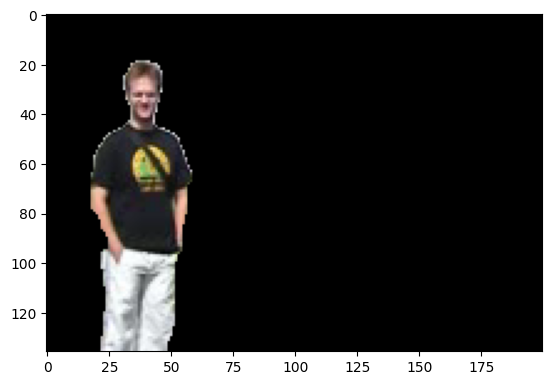

In [32]:
# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 前景マスクをバイナリに変換
#_, binary_mask = cv2.threshold(foreground_mask, 127, 255, cv2.THRESH_BINARY)

# 元の画像とマスクを利用して前景のみを抽出
foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=foreground_mask)

# 結果を表示
plt.imshow(foreground)

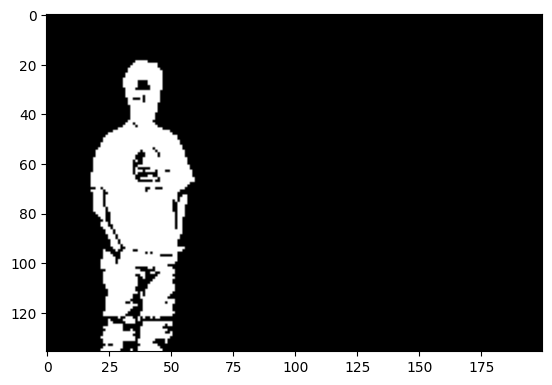

In [36]:
# 背景差分の取得
diff_image = cv2.absdiff(image_gray, background_gray)

# 背景差分を閾値で2値化
threshold = 40
_, foreground_mask = cv2.threshold(diff_image, threshold, 255, cv2.THRESH_BINARY)

# 結果を表示
plt.imshow(foreground_mask, cmap="gray")

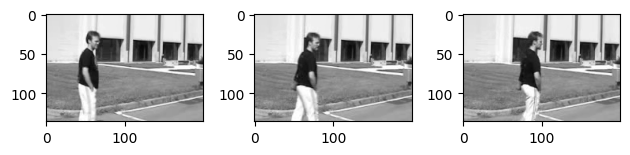

In [37]:
# 画像を読み込み
image_1 = cv2.imread("sbi/sbi170.png")
image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
image_2 = cv2.imread("sbi/sbi180.png")
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
image_3 = cv2.imread("sbi/sbi190.png")
image_3_gray = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(1, 3, tight_layout=True)
axes[0].imshow(image_1_gray, cmap="gray")
axes[1].imshow(image_2_gray, cmap="gray")
axes[2].imshow(image_3_gray, cmap="gray")

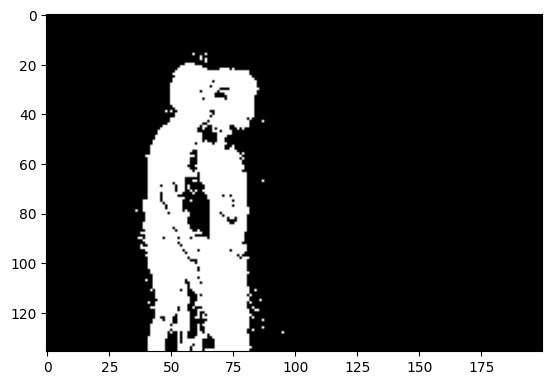

In [48]:
# 背景差分の初期化
diff_image_1 = cv2.absdiff(image_1_gray, image_2_gray)

# 背景差分を閾値で2値化
threshold = 10
_, mask_1 = cv2.threshold(diff_image_1, threshold, 255, cv2.THRESH_BINARY)

# 画像の表示
plt.imshow(mask_1, cmap="gray")

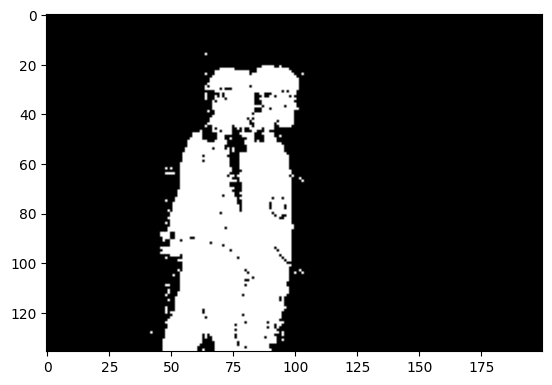

In [49]:
# 背景差分の初期化
diff_image_2 = cv2.absdiff(image_2_gray, image_3_gray)

# 背景差分を閾値で2値化
threshold = 10
_, mask_2 = cv2.threshold(diff_image_2, threshold, 255, cv2.THRESH_BINARY)

# 画像の表示
plt.imshow(mask_2, cmap="gray")

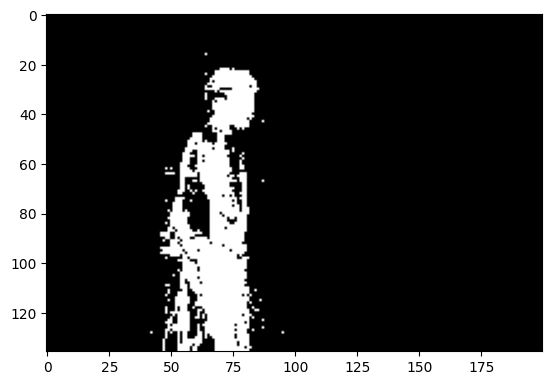

In [50]:
# AND演算を実行（論理積）
and_mask = cv2.bitwise_and(mask_1, mask_2)

# 画像の表示
plt.imshow(and_mask, cmap="gray")

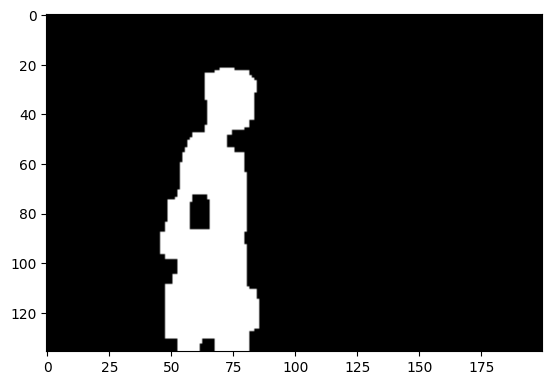

In [51]:
# カーネルの作成
kernel = np.ones((3, 3), np.uint8)  

# クロージング（エロージョン + ダイレーション）
and_mask = cv2.morphologyEx(and_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# オープニング（ダイレーション + エロージョン）
and_mask = cv2.morphologyEx(and_mask, cv2.MORPH_OPEN, kernel, iterations=2)

# 結果を表示
plt.imshow(and_mask, cmap="gray")

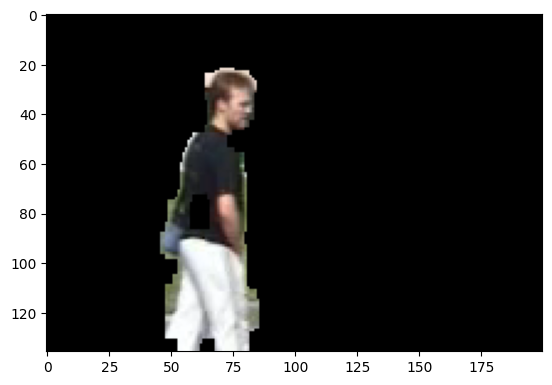

In [52]:
# BGRからRGBに変換
image_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# 前景マスクをバイナリに変換
#_, binary_mask = cv2.threshold(foreground_mask, 127, 255, cv2.THRESH_BINARY)

# 元の画像とマスクを利用して前景のみを抽出
foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=and_mask)

# 結果を表示
plt.imshow(foreground)